# Active Learning Experiment Script

Store the demonstration query data in `./Data` folder. Set the path to the data and output folders from `params.py`.

In [3]:
from DemoScript import *
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20,10]

First read the raw data and store only the points where proposition changes were observed

In [4]:
params.nTraj = 2
raw_data = read_raw_data(params.raw_data_path)
compressed_data = compress_data(raw_data)
write_data(params.compressed_data_path, compressed_data)
params.nSamples = 20000
params.nBurn = 500

Compute the batch posterior using the demonstrated trajectories

In [5]:

infer_command = f'webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nTraj {params.nTraj}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Data2/CompressedData' --outPath 'Distributions2' --nTraj 2


Compile a PUnS MDP and train a policy for the MDP with Q-learning

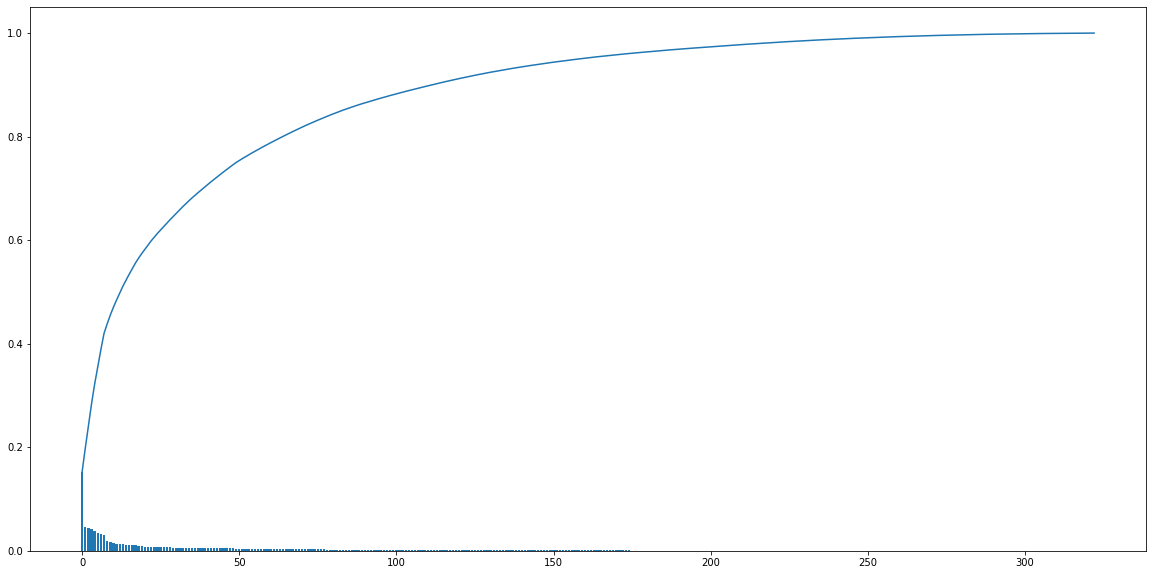

In [6]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

Determine what the terminal state rewards are and plot the terminal state rewards in ascending order

['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['F', ['W4']],
 ['U', ['not', ['W1']], ['W4']],
 ['U', ['not', ['W4']], ['W2']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W4']], ['W0']],
 ['U', ['not', ['W1']], ['W0']]]

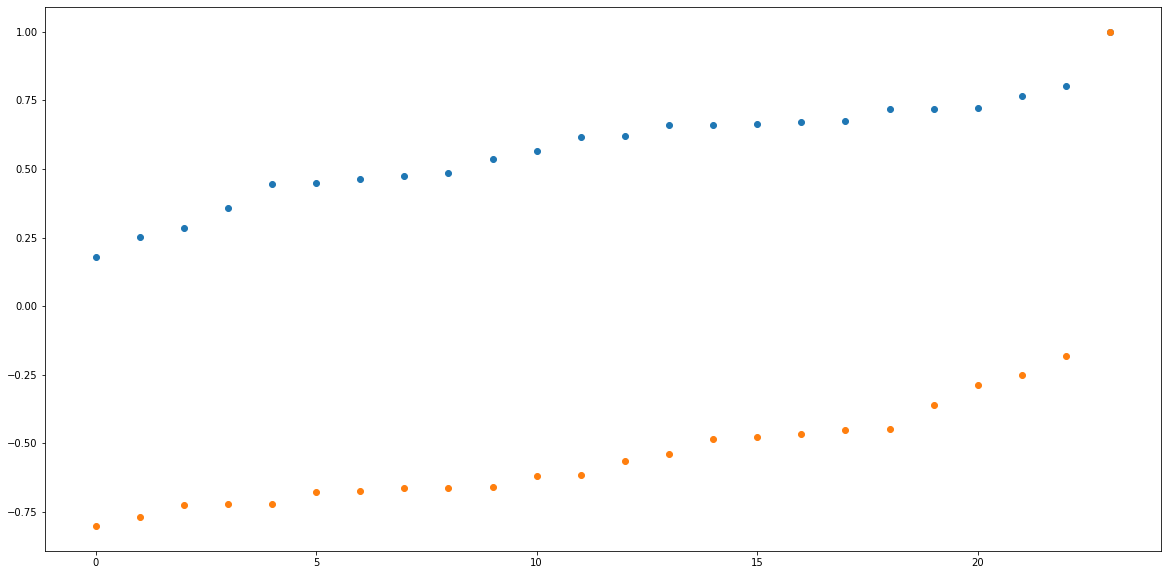

In [7]:
specification_fsm = MDP.specification_fsm
rewards = [specification_fsm.reward_function(state) for state in specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')
specification_fsm._formulas[0]

## First Query

**Train and demo query**

Training episode 4999         

/home/ajshah/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/ajshah/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


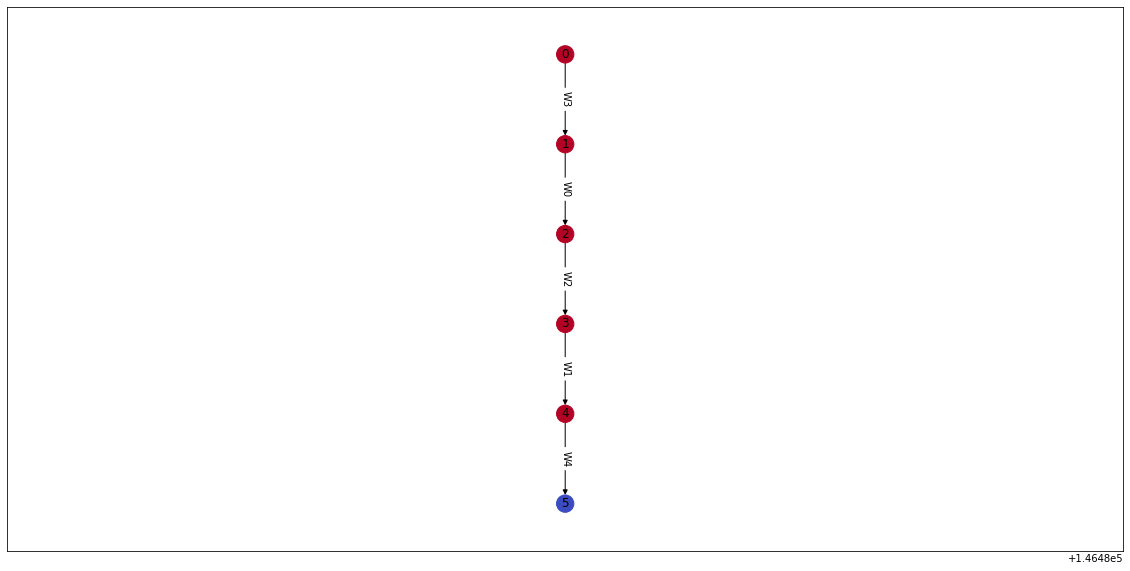

In [8]:
trace_slices = create_active_query(MDP, verbose=True)

**Ask for query label**

In [9]:
new_traj = create_query_demo(trace_slices)

write_demo_query_data(new_traj, True, params.compressed_data_path)

Writing file: query_1.json


In [10]:
i=1
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery {i}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Data2/CompressedData' --outPath 'Distributions2' --nQuery 1


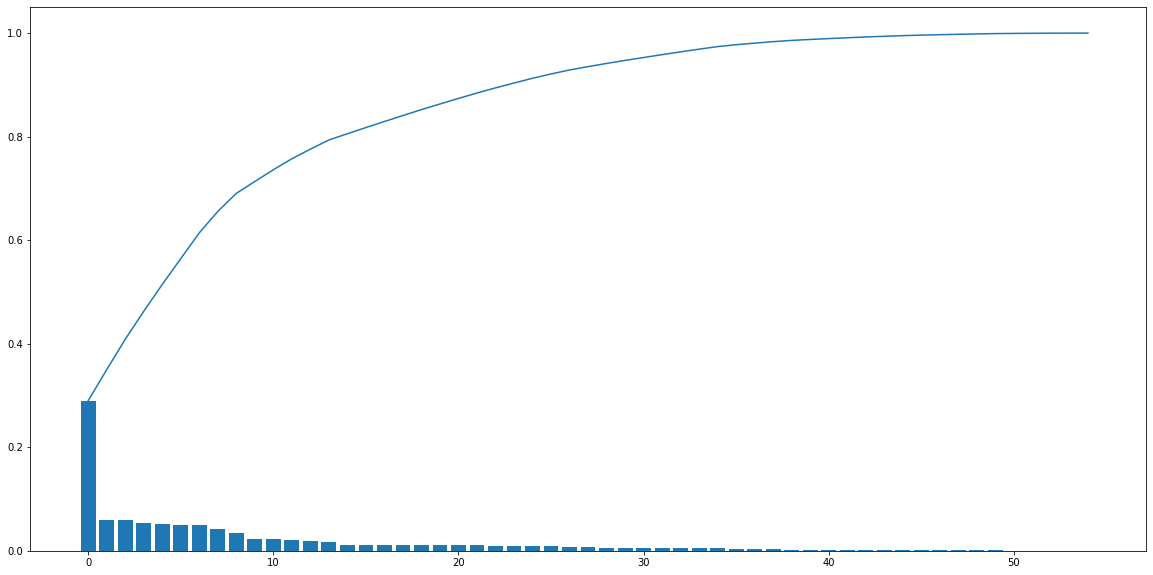

In [11]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

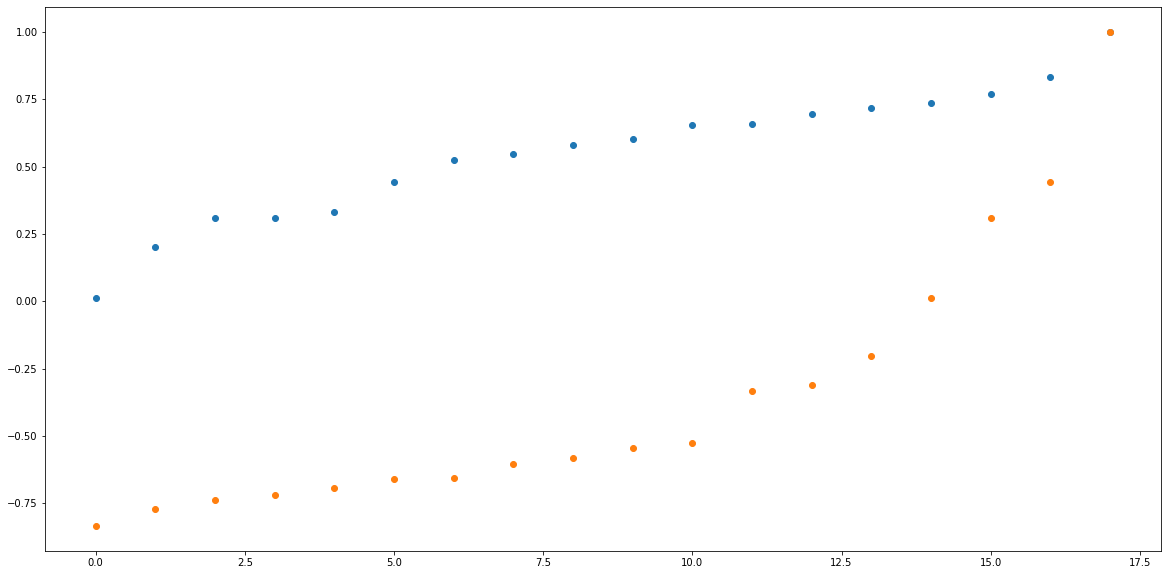

In [12]:
specification_fsm = MDP.specification_fsm
rewards = [specification_fsm.reward_function(state) for state in specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')


In [13]:
import pprint
i = 0

pprint.pprint(specification_fsm._formulas[i])
specification_fsm._partial_rewards[i]

['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['U', ['not', ['W4']], ['W2']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W4']], ['W0']]]


0.29

## Seocnd query

Training episode 29         

Training episode 63         

Training episode 98         

Training episode 131         

Training episode 165         

Training episode 201         

Training episode 236         

Training episode 271         

Training episode 304         

Training episode 342         

Training episode 378         

Training episode 413         

Training episode 448         

Training episode 483         

Training episode 516         

Training episode 549         

Training episode 584         

Training episode 618         

Training episode 656         

Training episode 691         

Training episode 728         

Training episode 763         

Training episode 797         

Training episode 831         

Training episode 866         

Training episode 902         

Training episode 939         

Training episode 4999         

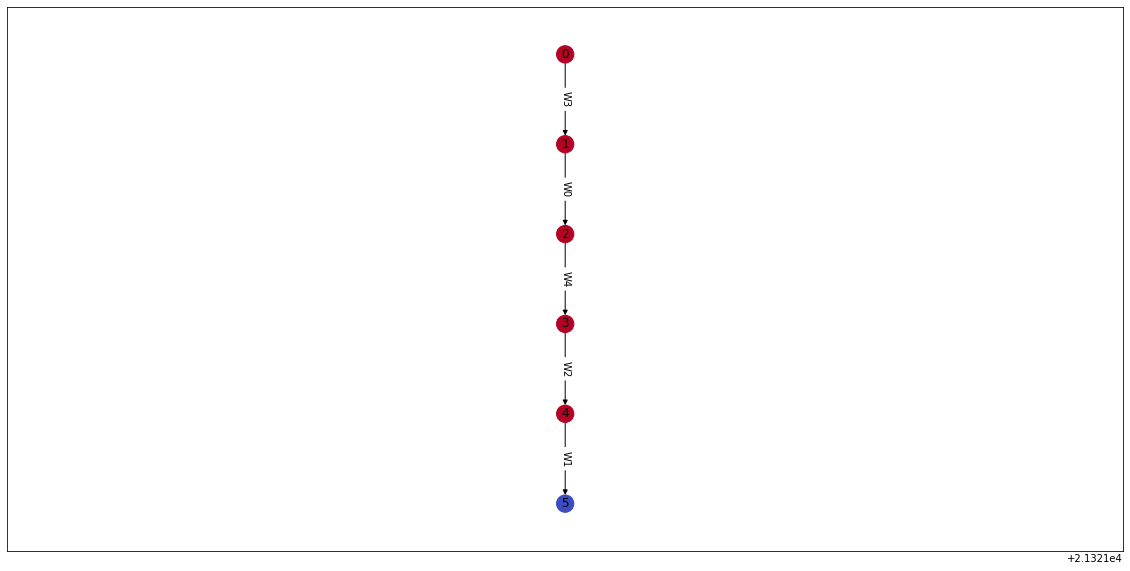

In [14]:
trace_slices = create_active_query(MDP, verbose=True)

**Ask for the label**

In [15]:
write_demo_query_data(new_traj, False, params.compressed_data_path)

Writing file: query_2.json


In [16]:
i=2
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery {i}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Data2/CompressedData' --outPath 'Distributions2' --nQuery 2


In [17]:
returnval

0

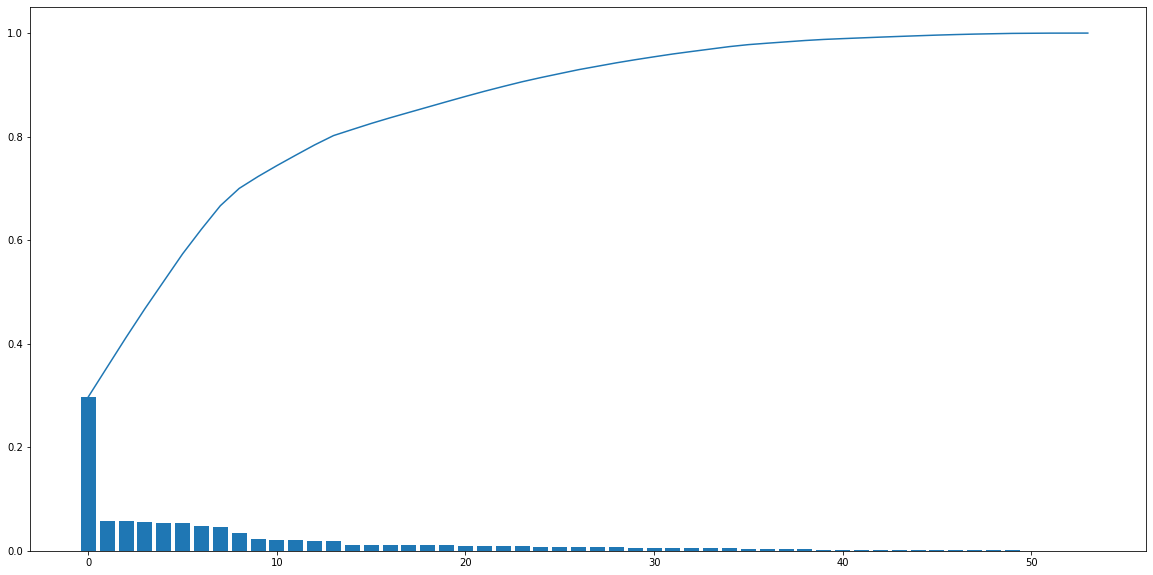

In [18]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

['and',
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W4']], ['W0']]]

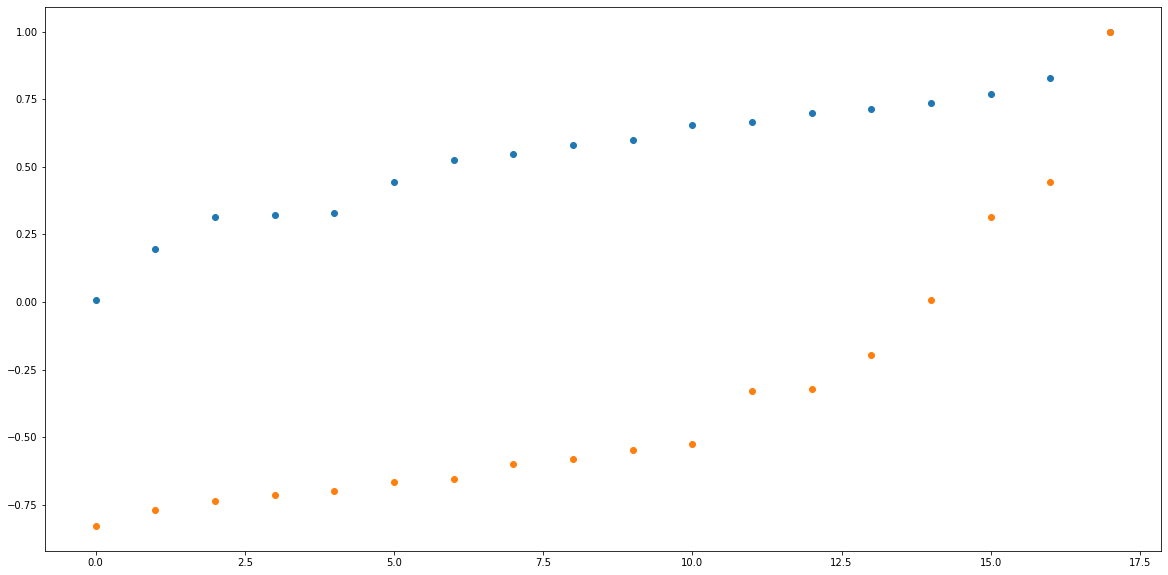

In [22]:
specification_fsm = MDP.specification_fsm
rewards = [specification_fsm.reward_function(state) for state in specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')
specification_fsm._formulas[2]

In [26]:
import pprint
i = 2

pprint.pprint(specification_fsm._formulas[i])
specification_fsm._partial_rewards[i]

['and',
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W4']], ['W0']]]


0.057249999999999995

Training episode 4999         

[{'W0': False, 'W1': False, 'W2': False, 'W3': False, 'W4': False},
 {'W0': False, 'W1': False, 'W2': False, 'W3': True, 'W4': False},
 {'W0': True, 'W1': False, 'W2': False, 'W3': False, 'W4': False},
 {'W0': True, 'W1': False, 'W2': False, 'W3': False, 'W4': False},
 {'W0': False, 'W1': False, 'W2': False, 'W3': False, 'W4': True},
 {'W0': False, 'W1': False, 'W2': True, 'W3': False, 'W4': False}]

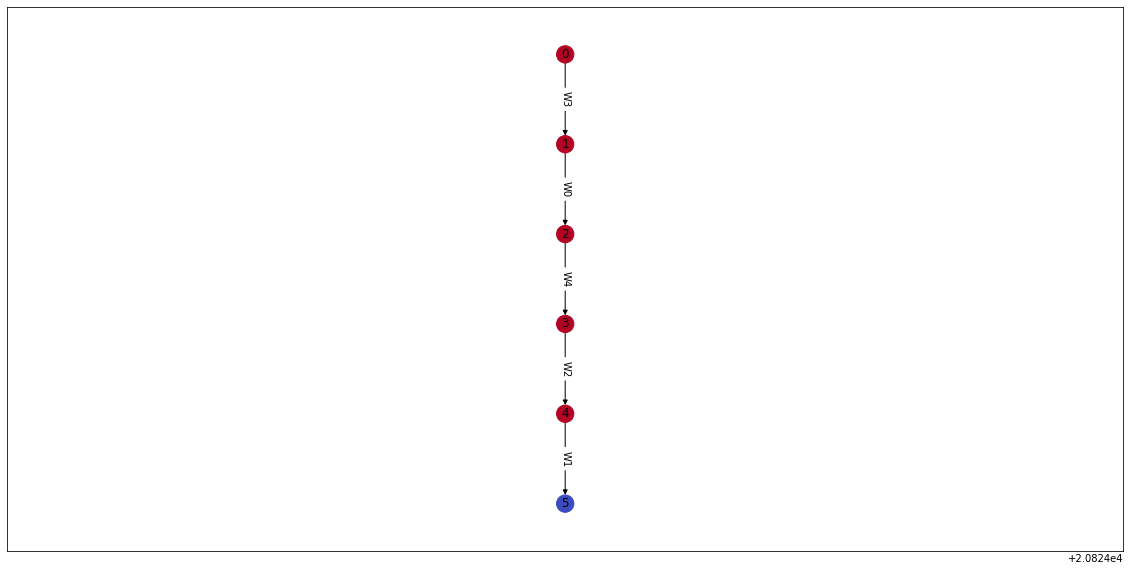

In [27]:
trace_slices = create_active_query(MDP, verbose=True)
trace_slices

In [28]:
write_demo_query_data(new_traj, False, params.compressed_data_path)

Writing file: query_3.json


In [29]:
i=3
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery {i}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Data2/CompressedData' --outPath 'Distributions2' --nQuery 3


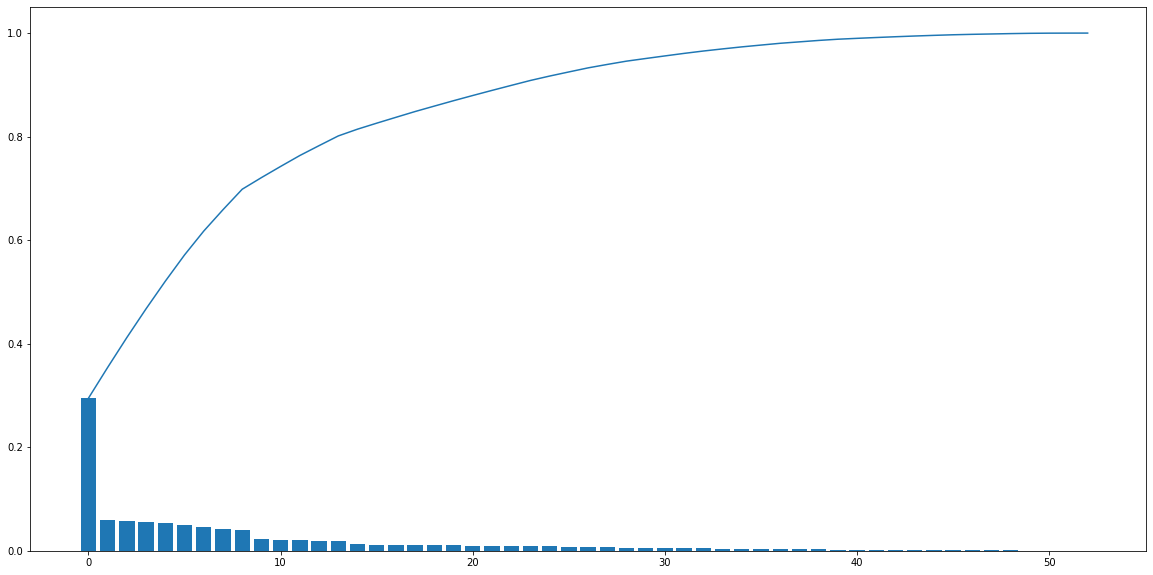

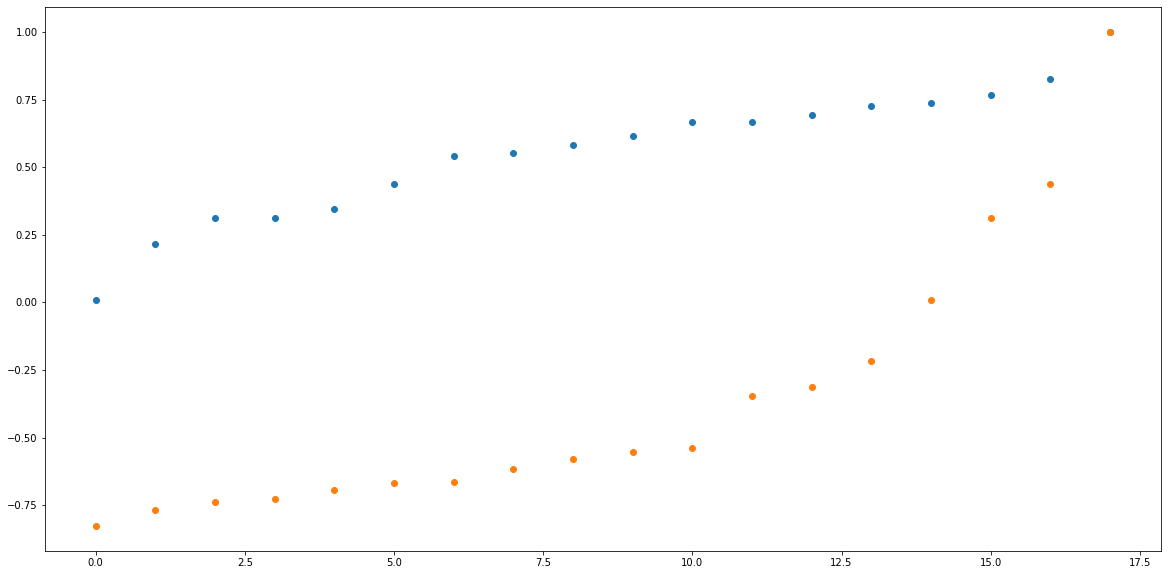

In [30]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

plt.figure()
specification_fsm = MDP.specification_fsm
rewards = [specification_fsm.reward_function(state) for state in specification_fsm.terminal_states]
plt.plot(np.sort(np.abs(rewards)),'o')
plt.plot(np.sort(rewards),'o')

In [31]:
MDP.specification_fsm._formulas[0]

['and',
 ['F', ['W0']],
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['U', ['not', ['W4']], ['W2']],
 ['U', ['not', ['W2']], ['W0']],
 ['U', ['not', ['W4']], ['W0']]]

Training episode 29         

Training episode 64         

Training episode 98         

Training episode 134         

Training episode 173         

Training episode 209         

Training episode 241         

Training episode 276         

Training episode 312         

Training episode 348         

Training episode 382         

Training episode 422         

Training episode 459         

Training episode 4999         

[{'W0': False, 'W1': False, 'W2': False, 'W3': False, 'W4': False},
 {'W0': True, 'W1': False, 'W2': False, 'W3': False, 'W4': False},
 {'W0': False, 'W1': False, 'W2': False, 'W3': False, 'W4': True},
 {'W0': False, 'W1': False, 'W2': True, 'W3': False, 'W4': False},
 {'W0': False, 'W1': False, 'W2': True, 'W3': False, 'W4': False},
 {'W0': False, 'W1': True, 'W2': False, 'W3': False, 'W4': False},
 {'W0': False, 'W1': True, 'W2': False, 'W3': False, 'W4': False}]

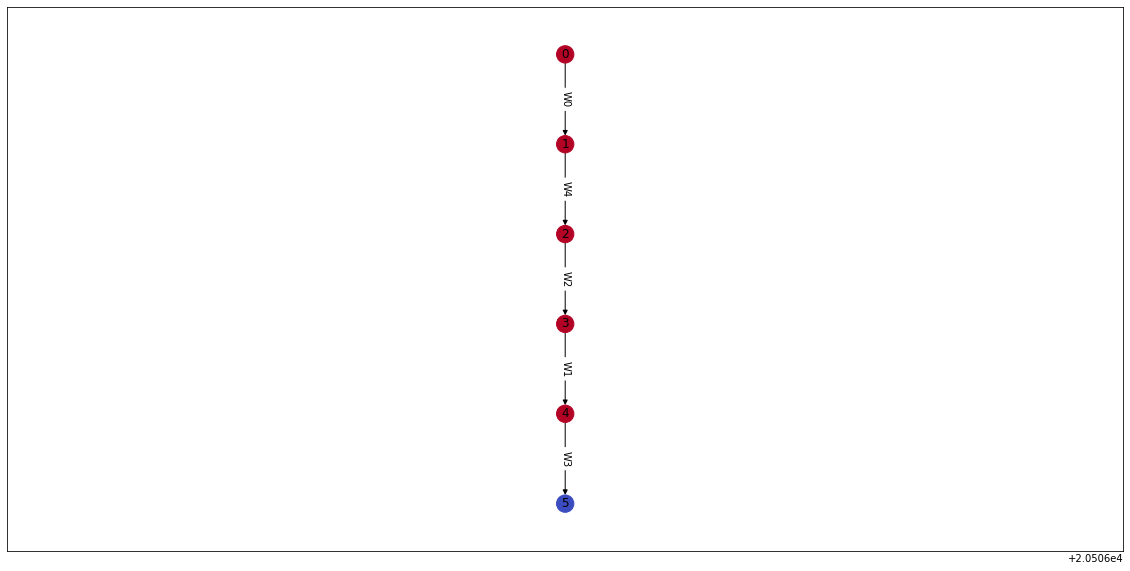

In [32]:
trace_slices = create_active_query(MDP, verbose=True)
trace_slices

In [33]:
write_demo_query_data(new_traj, False, params.compressed_data_path)

Writing file: query_4.json


In [34]:
i=4
infer_command = f'webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nQuery {i}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')
print(infer_command)

webppl active_bsi.js --require webppl-json --require webppl-fs -- --nSamples 20000  --nBurn 500 --dataPath 'Data2/CompressedData' --outPath 'Distributions2' --nQuery 4


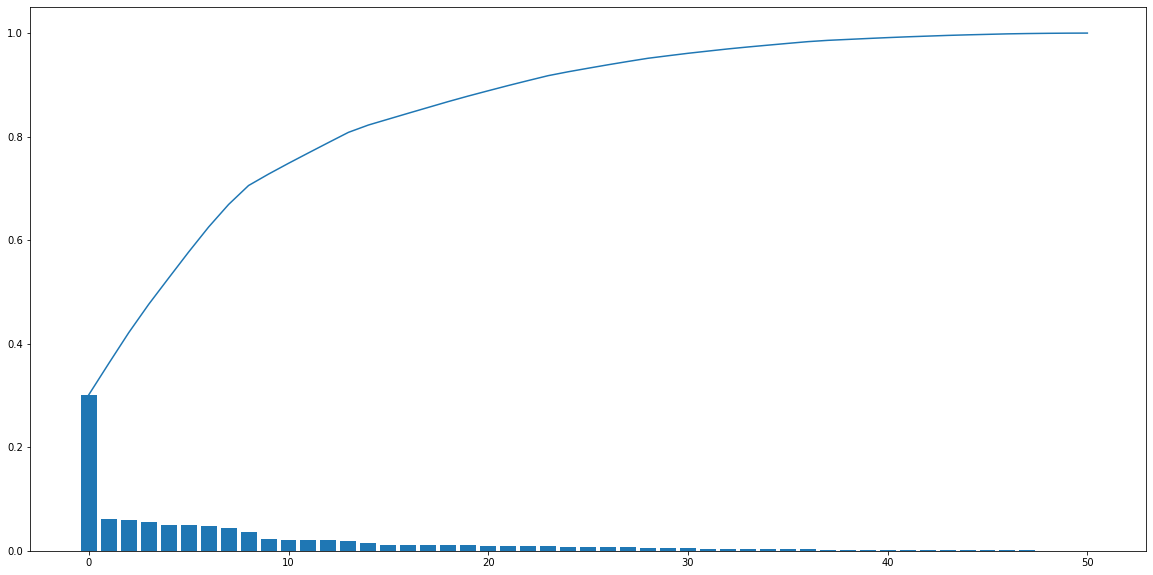

In [35]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

In [39]:
MDP.specification_fsm._formulas[3]

['and',
 ['F', ['W1']],
 ['F', ['W2']],
 ['F', ['W3']],
 ['U', ['not', ['W1']], ['W2']],
 ['U', ['not', ['W4']], ['W0']]]